# Competition #1 Final Project Path

By : Anthony Chung, Andrew Tropeano, Russell Coontid, Jiehao Yang

In [1]:
#Objective: To clean data by replace error to NaN and then replace NaN with mean
#1 Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import inf
from scipy.stats import mode
import seaborn as sns


# Importing Data

In [2]:
# Importing excel file
xl = pd.ExcelFile("Competation #1 Raw Data_New.xlsx")
xl.sheet_names
[u'Sheet1']
df = xl.parse("Sheet1")

# Data Preprocessing 

## Data Cleaning (Replacing "-" with NaN)
- Cleaning the data by replacing '-' with NaN to change it to columns that is calculable

In [3]:
#Replace each columns error value to NaN value
#I3
df['I1'].replace('-', np.nan, inplace=True)
df['I2'].replace('-', np.nan, inplace=True)
df['I3'].replace('-', np.nan, inplace=True)
#P(IPO), P(H), P(L), P(1Day)
df['P(IPO)'].replace('-', np.nan, inplace=True)
df['P(H)'].replace('-', np.nan, inplace=True)
df['P(L)'].replace('-', np.nan, inplace=True)
df['P(1Day)'].replace('-', np.nan, inplace=True)

#C1	C2	C3	C4	C5	C6	C7
df['C1'].replace('-', np.nan, inplace=True)
df['C2'].replace('-', np.nan, inplace=True)
df['C3'].replace('-', np.nan, inplace=True)
df['C4'].replace('-', np.nan, inplace=True)
df['C5'].replace('-', np.nan, inplace=True)
df['C6'].replace('-', np.nan, inplace=True)
df['C7'].replace('-', np.nan, inplace=True)
#T1	T2	T3	T4	T5
df['T1'].replace('-', np.nan, inplace=True)
df['T2'].replace('-', np.nan, inplace=True)
df['T3'].replace('-', np.nan, inplace=True)
df['T4'].replace('-', np.nan, inplace=True)
df['T5'].replace('-', np.nan, inplace=True)
#S1	S2	S3
df['S1'].replace('-', np.nan, inplace=True)
df['S2'].replace('-', np.nan, inplace=True)
df['S3'].replace('-', np.nan, inplace=True)

## Remove rows that has 50% or more missing.
- Dropping NaN values in the df by setting if there is less than 14 values in a row (More than 50% missing)

In [4]:
df1 = df.dropna(thresh=14)

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673 entries, 0 to 681
Data columns (total 22 columns):
I1         673 non-null object
I2         673 non-null object
I3         673 non-null object
P(IPO)     673 non-null float64
P(H)       671 non-null float64
P(L)       671 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         645 non-null float64
C4         660 non-null float64
C5         673 non-null float64
C6         673 non-null float64
C7         609 non-null float64
T1         673 non-null float64
T2         673 non-null float64
T3         673 non-null float64
T4         673 non-null float64
T5         673 non-null float64
S1         673 non-null float64
S2         673 non-null float64
S3         673 non-null float64
dtypes: float64(19), object(3)
memory usage: 120.9+ KB
None


## Changing Objects into Numeric 
- In order to calculate the median and impute the NaN values with it. The data have to first be change to Numeric

In [5]:
#Create a for loop to turn all columns to numeric in order to calculate median
for c in df1[['P(IPO)','P(H)','P(L)',"P(1Day)",'C1','C2','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']]:
    df1[c] = pd.to_numeric(df1[c])
    

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Imputation on NaN values with Median and Mode
- Imputing NaN values with Median by creating a for loop that loops through all continous variables in the df
- Also to impute categorial  variables with Mode

In [6]:
#imputing each column with the median
for c in df1[['P(IPO)','P(H)','P(L)',"P(1Day)",'C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']]:
    df1[c] = df1[c].transform(lambda x: x.fillna(x.median()))

#Compute ['C2'] by fillin nan with max count
#df1['C2'].transform(lambda x: x.fillna(x.mode()))
df1['C2'].fillna(mode(df1['C2']).mode[0], inplace=True)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


# Create New variables (C31, C51,P(mid) C61, L1,L2,L3,L4,L5,L6, Y1,Y2)
- Aggregating variables together to create C31, C51, P(mid), L1-L6 for more usefulness in percentage
- Create Y1 and Y2 from P(IPO),P(H),P(L),P(1Day)

In [7]:
#Create new aggregated columns 
df1['C31'] = np.where(df1['C3']>=0, 1,0)
df1['C51'] = df1['C5']/df1['C6']
df1['P(mid)'] = (df1['P(H)']+df1['P(L)'])/2
df1['C61'] = np.where(df1['P(IPO)']>df1['P(mid)'],((df1['P(IPO)']-df1['P(mid)'])/df1['P(mid)']*100),0) #Check
df1['L1'] = df1['T4']/df1['T1']
df1['L2'] = df1['T3']/df1['T2']
df1['L3'] = df1['T5']/df1['T2']
df1['L4'] =df1['S1']/df1['T2']
df1['L5'] =df1['S2']/df1['T2']
df1['L6'] =df1['S3']/df1['T2']
df1['Y1'] = np.where(df1['P(IPO)']<df1[('P(mid)')],1,0)
df1['Y2'] = np.where(df1['P(IPO)']< df1[('P(1Day)')],1,0)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

# Correlation Analysis (Heatmap)

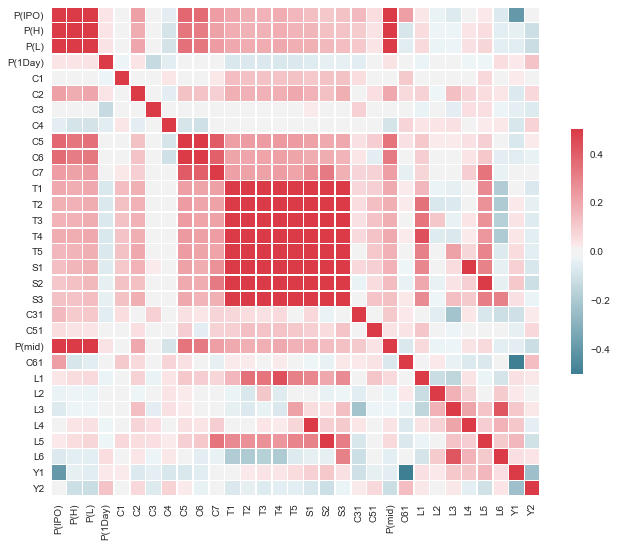

In [8]:
#create a correlation heat map 
# Compute the correlation matrix
corr = df1.corr()


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [9]:
print(df1.head())
print(df1.info())
print(df1.describe())

     I1                                  I2    I3  P(IPO)  P(H)  P(L)  \
0  AATI  ADVANCED ANALOGIC TECHNOLOGIES INC  3674    10.0   9.5   8.5   
1  ABPI     ACCENTIA BIOPHARMACEUTICALS INC  2834     8.0  10.0   8.0   
2  ACAD          ACADIA PHARMACEUTICALS INC  2834     7.0  14.0  12.0   
3  ACHN       ACHILLION PHARMACEUTICALS INC  2834    11.5  16.0  14.0   
4  ACLI     AMERICAN COMMERCIAL LINES INC.   4492    21.0  21.0  19.0   

     P(1Day)     C1   C2    C3 ...  P(mid)        C61        L1        L2  \
0  11.870000  122.0  1.0  3.43 ...     9.0  11.111111  0.640426  0.908876   
1   7.250000  259.0  0.0 -1.62 ...     9.0   0.000000  0.644753  0.898724   
2   6.700000   90.0  1.0 -1.24 ...    13.0   0.000000  0.636816  0.909350   
3  12.390000  209.0  1.0 -0.91 ...    15.0   0.000000  0.539634  0.917060   
4  56.599998   80.0  1.0  0.07 ...    20.0   5.000000  0.587413  0.888469   

         L3        L4        L5        L6  Y1  Y2  
0  0.054250  0.004875  0.009199  0.010929   0 

# Imputation on Inf values in aggregated column
- We decided to impute the Inf values with the median of the variable

In [10]:
#Impute the infinite values with median in L1 - L6
for c in df1[['L1','L2','L3','L4','L5','L6']]:
    df1[c] = df1[c].transform(lambda x: x.replace(inf,x.median()))


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Data Dictionary

| Variable| 	Calculation	| Name | 
| ------------- |:-------------:| -----:|
| I1	| 	| Ticker
| I2	| 	| Company Name
| I3	| | 	Standard Industry Classifier
| P(IPO)	| | 	Offer Price
| P(H)	| | 	Higher Bound
| P(L)	| | 	Lower Bound
| P(1Day)| | 		First Day Trading Price
| C1	| | 	Days
| C2	| | 	Top-tier-Dummy
| C3	| | 	Earnings Per Share
| C4	| | 	Prior Nasdaq 15-days returns
| C5	| | 	Outstanding shares
| C6	| | 	Offering Shares
| C7	| | 	Sales
| P(mid)| 	P(h)+P(L) / 2| 	Mid bound
| C31	| if C3 is positive | 	EPS Dummy C3'
| C51	| C5/C6	| Share overhang C5'
| C61	| | 	Up revision C6'
| L1	| T4/ T1| 	Percent of long sentences
| L2	| T3/T2	| Percent of real word
| L3	| T5/T2| 	Percent of long words
| L4| 	S1/T2| 	Percent of positive words
| L5	| S2/T2| 	Percent of Negative word
| L6	| S3/T2	| Percent of uncertain words
| Y1	| P(IPO) < P(mid)| 	Pre- IPO Price Revision
| Y2	| P(IPO)< P(1Day)	| Post -IPO initial 

# Exclusion/ Inclusion Rule

Incusion: C2, L5, C31, C61

**Y1 Model Exclusion Rules:**

- Exclusion rule: P(IPO), P(H), P(L), P(1Day)
    - All used to derive Y1 and/or Y2, therefore must be excluded from model.


- Exclusion rule: T1, T2, T3, T4, T5, S1, S2, S3
    - These are all used to derive L1-L6


- Exclusion rule: C1, C4
    - These two time-related variables, when added to our model along with variables C2, L5, C31, and C61, increase the model’s dimensionality without increasing its accuracy, therefore it would be imprudent to include them.


- Exclusion rule: C3
    - There is no need to include both C3 and C31 in the model, as they are both EPS indicators. C31 proved to be the stronger predictor of our target variables, so C3 can be excluded.


- Exclusion rule: C5, C6, C51
    - These variables pertain purely to quantity of shares. Without the context of earnings pertaining to these shares (EPS), this information is not helpful. Instead, we’ll look to incorporate EPS measures instead.


- Exclusion rule: C7
    - Earnings are factored into the model via C31, which is a more accurate financial indicator than sales, as earnings is the remaining sales revenue left over after all operating expenses, interest, taxes, etc. have been deducted from total revenue.
    

- Exclusion rule: L1, L2, L3, L4, L6
    - The only unbiased information of merit for investors in the MD&A section comes in numerical form – the company’s financial fundamentals (balance sheet, income statement, cash flow, etc.) These excluded variables only reflect the non-numerical contents for the MD&A section, which can be completely biased, subjective, anecdotal, etc.


- Exclusion rule: I1, I2
    - Identifier fields cannot be used as predictor variables.


- Exclusion rule: I3
    - Industry classifier codes are outdated and do not enable relevant groupings for predictive analysis.


- Exclusion rule: Y1
    - Y1 is the target variable, therefore it cannot also be used as a predictor variable.


- Exclusion rule: Y2
    - Y2 cannot be used as a predictor variable as this would mean peeking into the future.


**Y2 Model Exclusion Rules**

- The same Y1 exclusion rules apply to the Y2 model, with the exception of the Y1 exclusion rule, as it is no longer the target variable and would not require peeking into the future.


# Create new dataframe with the inclusion variables

In [11]:
Test = df1[['C2','C31','C61','L5','Y1','Y2']]

In [12]:
Test.to_excel('Competition.xlsx', index=False)

# Inputing to SPSS for transformation


- Export the Competition.xlsx from this python script and input it in the Excel node in SPSS file 'Competition#1.str'


- In the Excel node go to the Type tab and change the Y1 and Y2 Measurement to Categorial and also change the Role of Y1 and Y2 as target


- Trasnform with the SPSS node Auto Data Prep, in Field tab select the predictors as input and Y1 as target. Then in the Setting tab under Prepare inputs and target change the rescalling method from Z-score to Min-Max transformation. Click Analyze


- Connect the Auto Data Prep to the table node and select the output to file as csv file. Click Run to produce the Competition1 Final dataset 
